In [1]:
# your code
import pandas as pd
import pm4py
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.statistics.traces.generic.log import case_statistics
from pm4py.objects.conversion.log import converter as log_converter

#Import right event log
df = pd.read_csv("benchmark.csv" ,delimiter=';' )
dw = pd.read_csv("benchmark.csv" ,delimiter=';' )
# get all variants from correct data 
log_csv = dataframe_utils.convert_timestamp_columns_in_df(df)
log_csv = log_csv.sort_values('time:timestamp')
event_log = log_converter.apply(log_csv)
#wrong log
log_csv = dataframe_utils.convert_timestamp_columns_in_df(dw)
log_csv = log_csv.sort_values('time:timestamp')
wrong_log = log_converter.apply(log_csv)

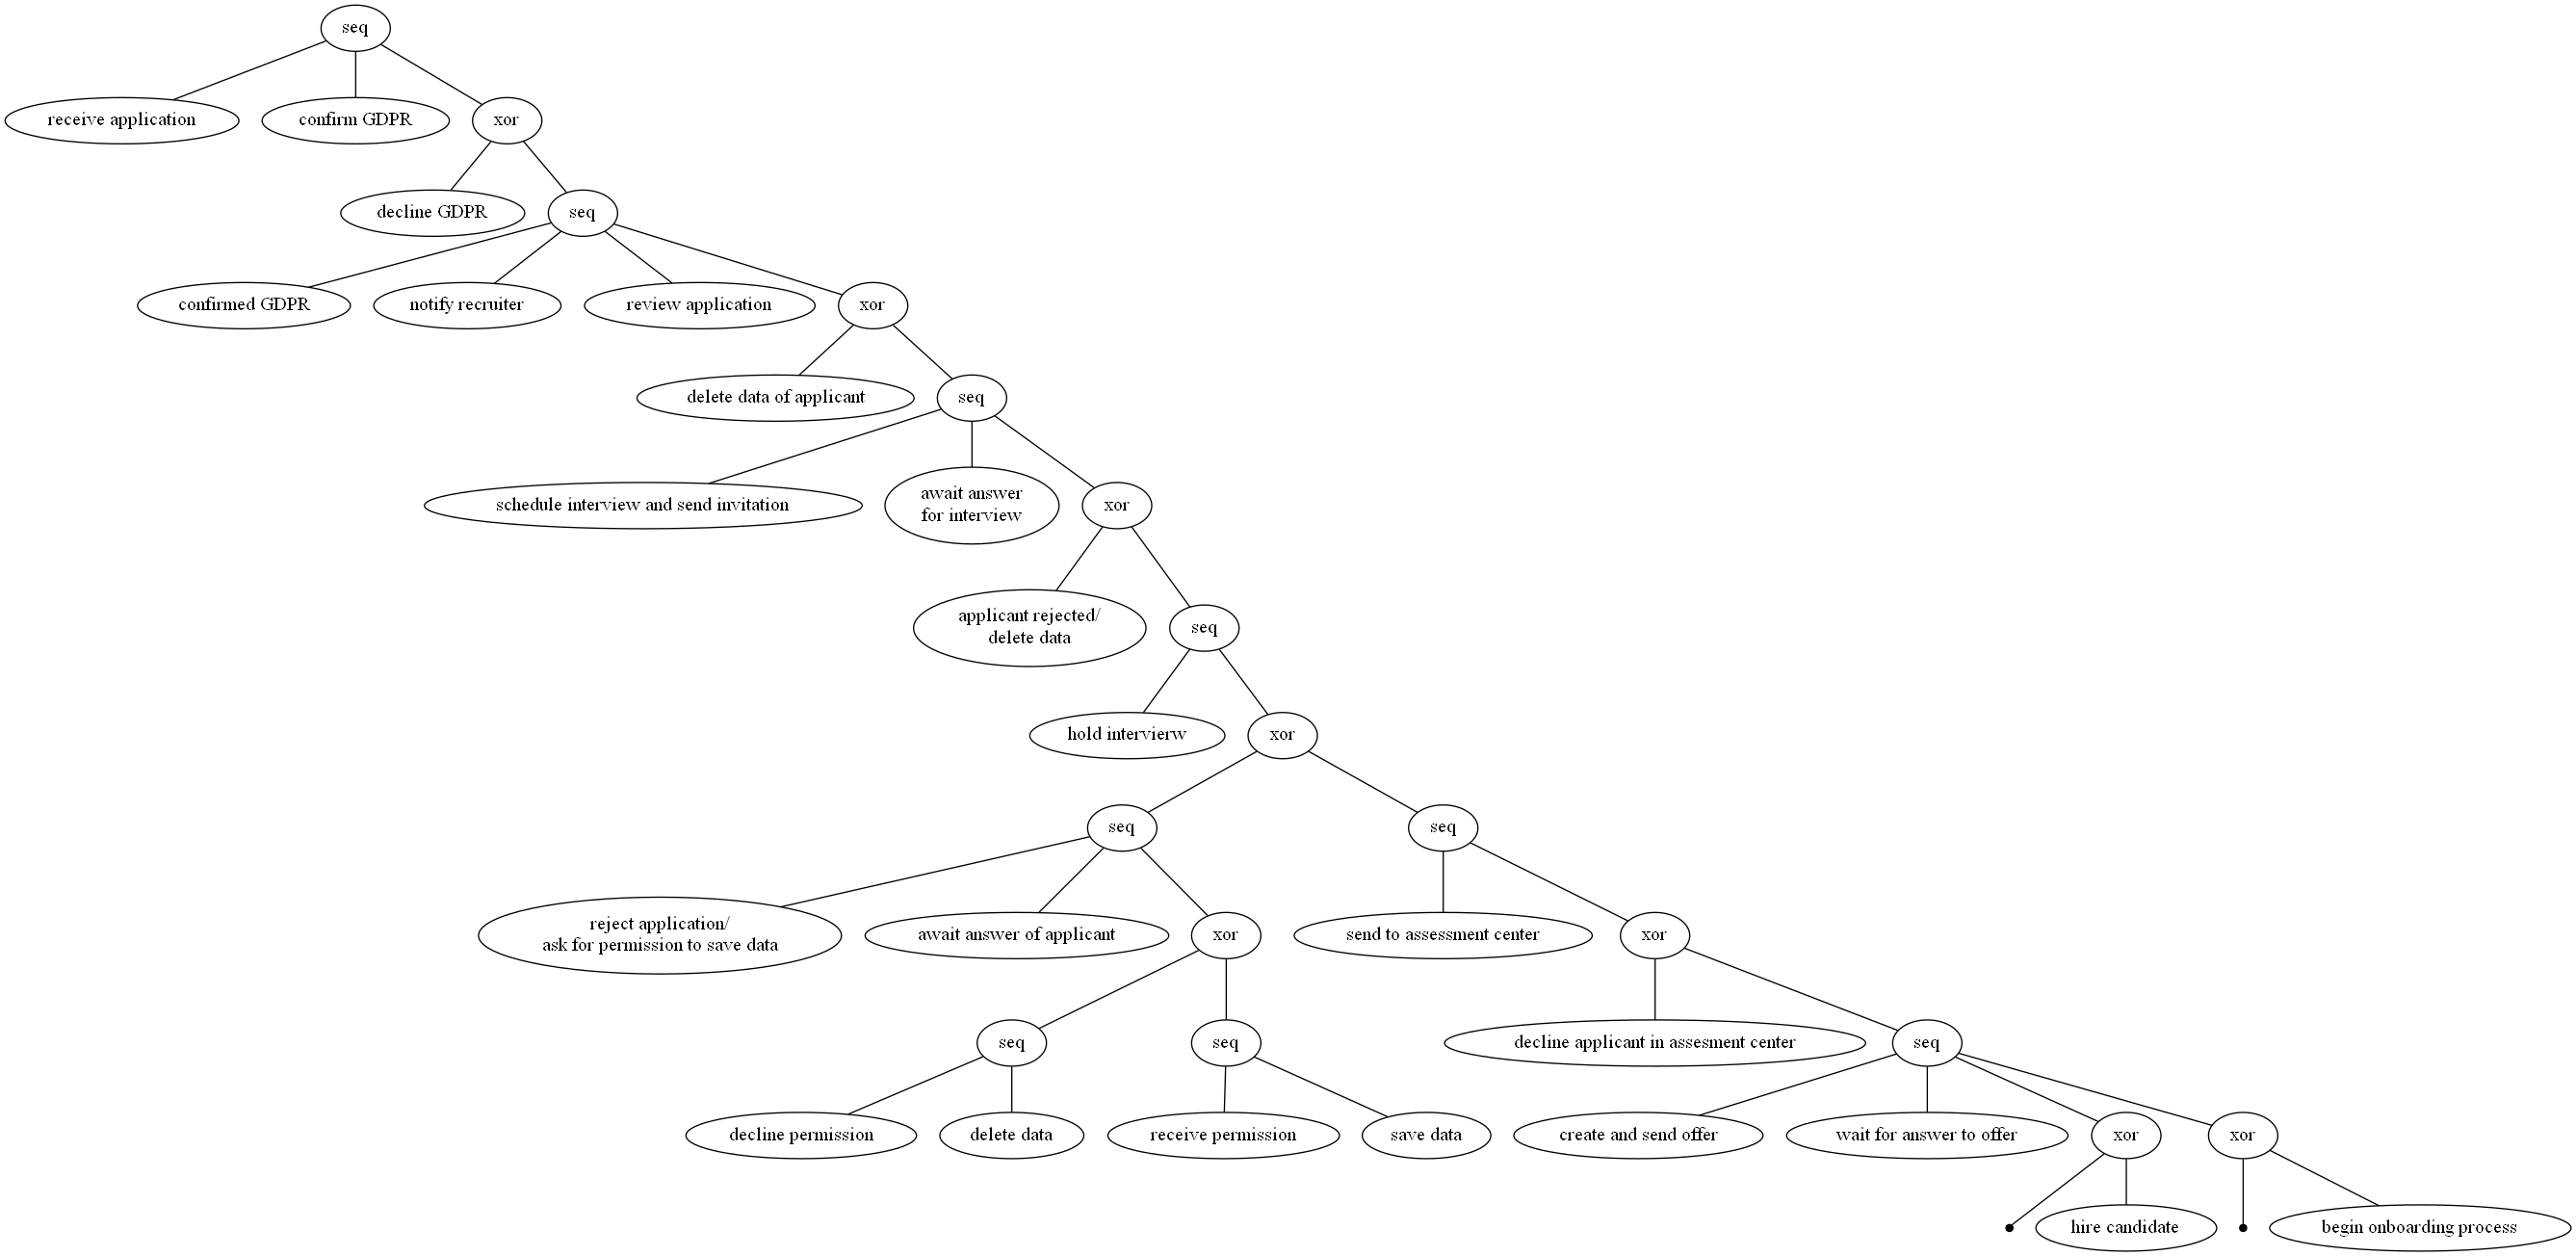

In [2]:
tree = inductive_miner.apply_tree(event_log)
# 1 filtered_log_variants
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

In [3]:
#alpha miner
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(event_log)

net, initial_marking, final_marking = alpha_miner.apply(event_log)

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(wrong_log, net, initial_marking, final_marking)

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

In [4]:
# Computing trace fitness
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

print(event_log[0])
# Computing log fitness
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(wrong_log, net, initial_marking, final_marking)

{'attributes': {'concept:name': 'Trace 3509'}, 'events': [{'ID': 19251, 'concept:name': 'receive application', 'time:timestamp': Timestamp('2021-11-02 23:35:26+0000', tz='UTC'), 'pName': 'Hans'}, '..', {'ID': 19263, 'concept:name': 'begin onboarding process', 'time:timestamp': Timestamp('2021-11-03 17:48:29+0000', tz='UTC'), 'pName': 'Hans'}]}


replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

In [5]:
d=0
for i in range(len(replayed_traces)):
    d+= replayed_traces[i]["trace_fitness"]
d/=len(replayed_traces)
print(f"Trace Fitness is: {d}")

Trace Fitness is: 0.9988053846153824


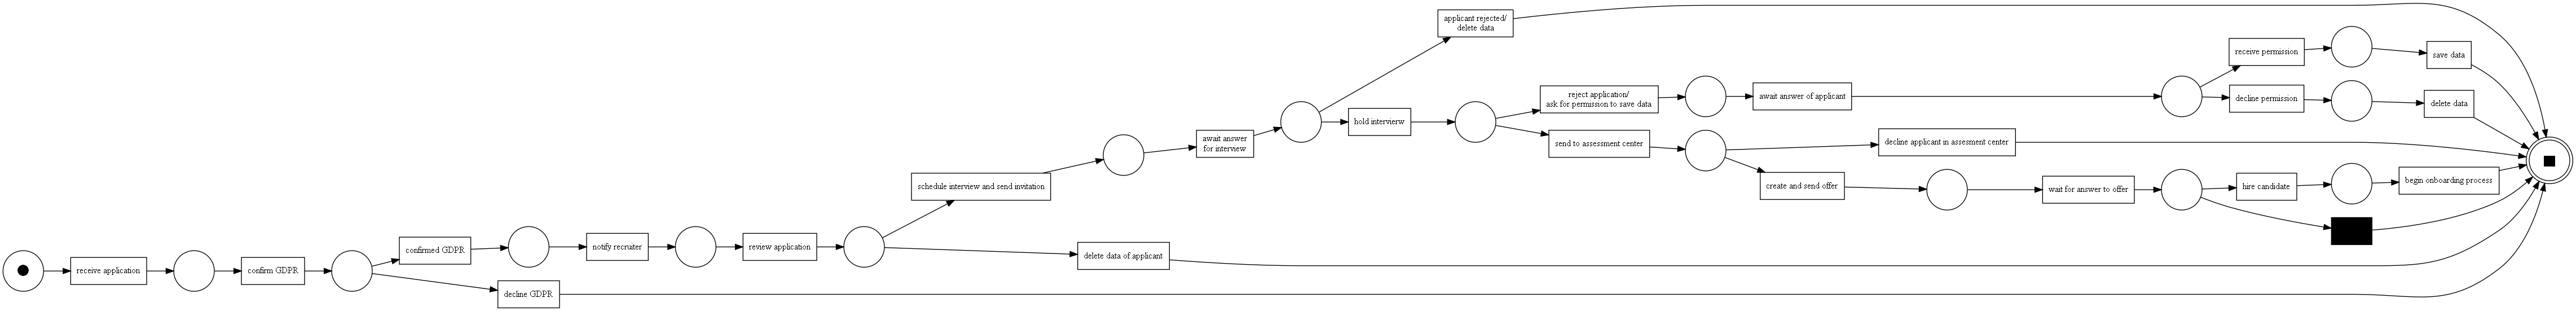

{'attributes': {'concept:name': 'Trace 3509'}, 'events': [{'ID': 19251, 'concept:name': 'receive application', 'time:timestamp': Timestamp('2021-11-02 23:35:26+0000', tz='UTC'), 'pName': 'Hans'}, '..', {'ID': 19263, 'concept:name': 'begin onboarding process', 'time:timestamp': Timestamp('2021-11-03 17:48:29+0000', tz='UTC'), 'pName': 'Hans'}]}


replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

Trace Fitness is: 0.6311220002219681


In [6]:
#heuristic Miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
net, im, fm = heuristics_miner.apply(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.petri_net import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)
# Computing trace fitness
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

print(event_log[0])
# Computing log fitness
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(wrong_log, net, initial_marking, final_marking)
d=0
for i in range(len(replayed_traces)):
    d+= replayed_traces[i]["trace_fitness"]
d/=len(replayed_traces)
print(f"Trace Fitness is: {d}")

In [7]:
print(f"Trace Fitness is: {d}")

Trace Fitness is: 0.6311220002219681


In [8]:
#inductive miner
net, initial_marking, final_marking = inductive_miner.apply(event_log)
# Computing trace fitness
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

print(event_log[0])
# Computing log fitness
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replayed_traces = token_replay.apply(wrong_log, net, initial_marking, final_marking)

d=0
for i in range(len(replayed_traces)):
    d+= replayed_traces[i]["trace_fitness"]
d/=len(replayed_traces)
print(f"Trace Fitness is: {d}")

{'attributes': {'concept:name': 'Trace 3509'}, 'events': [{'ID': 19251, 'concept:name': 'receive application', 'time:timestamp': Timestamp('2021-11-02 23:35:26+0000', tz='UTC'), 'pName': 'Hans'}, '..', {'ID': 19263, 'concept:name': 'begin onboarding process', 'time:timestamp': Timestamp('2021-11-03 17:48:29+0000', tz='UTC'), 'pName': 'Hans'}]}


replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

Trace Fitness is: 1.0


In [9]:
print(f"Trace Fitness is: {d}")

Trace Fitness is: 1.0
